# Домашняя работа №5

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail(50)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
533,46,Female,1.4,0.4,298,509,623,3.6,1.0,0.30,1
534,39,Male,1.6,0.8,230,88,74,8.0,4.0,1.00,2
535,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
536,46,Male,15.8,7.2,227,67,220,6.9,2.6,0.60,1
537,10,Female,0.8,0.1,395,25,75,7.6,3.6,0.90,1
538,52,Male,1.8,0.8,97,85,78,6.4,2.7,0.70,1
539,65,Female,0.7,0.2,406,24,45,7.2,3.5,0.90,2
540,42,Male,0.8,0.2,114,21,23,7.0,3.0,0.70,2
541,42,Male,0.8,0.2,198,29,19,6.6,3.0,0.80,2
542,62,Male,0.7,0.2,173,46,47,7.3,4.1,1.20,2


In [3]:
len(data[data['Dataset']==2])

167

In [4]:
len(data[data['Dataset']==1])

416

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [5]:
# расчет коэффициента корреляции и p-value
from scipy.stats import pearsonr
pearsonr(data['Direct_Bilirubin'], data['Total_Bilirubin'])

(0.8746179301164123, 7.873553178042517e-185)

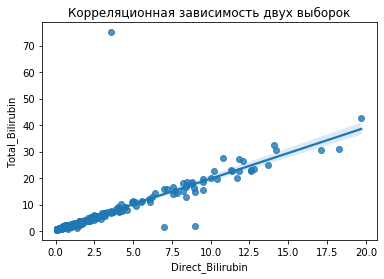

In [29]:
sns.regplot(x=data['Direct_Bilirubin'], y=data['Total_Bilirubin'], data=data, fit_reg=True)
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
Direct_Bilirubin = np.array(data['Direct_Bilirubin']).reshape(-1,1)
Total_Bilirubin = np.array(data['Total_Bilirubin']).reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Total_Bilirubin,
    Direct_Bilirubin,
    test_size = 0.2
)
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
print('Среднеквадратичная ошибка: ', mean_squared_error(predicted_y, y_test))
print('Абсолютная ошибка: ', mean_absolute_error(predicted_y, y_test))

Среднеквадратичная ошибка:  0.8904712155311321
Абсолютная ошибка:  0.4610366432893564


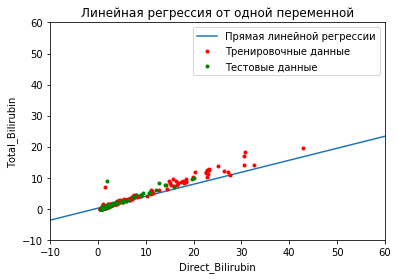

In [53]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия от одной переменной')

x = np.linspace(-10, 500, 10)

y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g.')
plt.xlim(-10,60)
plt.ylim(-10,60)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Пример, как считать квантили:

In [5]:
age = data['Age']

In [6]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [55]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [11]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех **колонок**. 

Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [85]:
young = data[data.Age <= 50]
old = data[data.Age > 50]
# len(young.Direct_Bilirubin)
# len(old.Direct_Bilirubin)

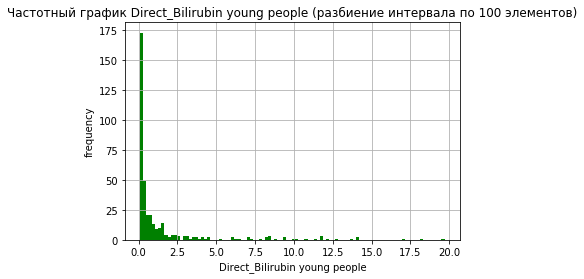

In [69]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(young['Direct_Bilirubin'], 100, facecolor='g')

plt.xlabel('Direct_Bilirubin young people')
plt.ylabel('frequency')
plt.title('Частотный график Direct_Bilirubin young people (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

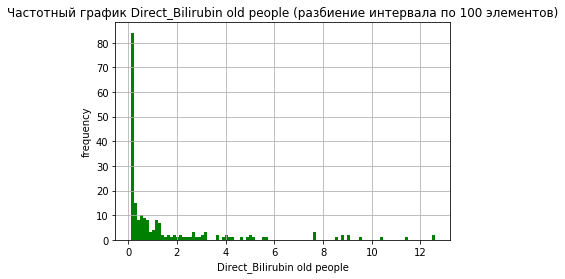

In [70]:
n, bins, patches = plt.hist(old['Direct_Bilirubin'], 100, facecolor='g')

plt.xlabel('Direct_Bilirubin old people')
plt.ylabel('frequency')
plt.title('Частотный график Direct_Bilirubin old people (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

In [75]:
statistics.mean(young['Direct_Bilirubin'])

1.4877659574468085

In [80]:
young['Direct_Bilirubin'].quantile(.50)

0.3

In [76]:
statistics.mean(old['Direct_Bilirubin'])

1.4830917874396135

In [81]:
old['Direct_Bilirubin'].quantile(.50)

0.4

Показатель Direct_Bilirubin у людей старше 50 лет в среднем превышает этот показатель у людей младше 50 лет, что видно и на графиках. А вот при рассчете среднего получился обратный результат - среднее значение по показателю Direct_Bilirubin у молодых людей было немного больше, чем для людей старше 50, скорее всего, в связи с размером выборки, молодых людй в таблице почти в 2 раза больше, чем пожилых.

Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных (выборки полученной) - 1)

Нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности.

In [16]:
Total_Bilirubin_ill = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(Total_Bilirubin_ill, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

In [8]:

print('Количество больныых людей: ', len(data[data['Dataset']==1]))

Количество больныых людей:  416


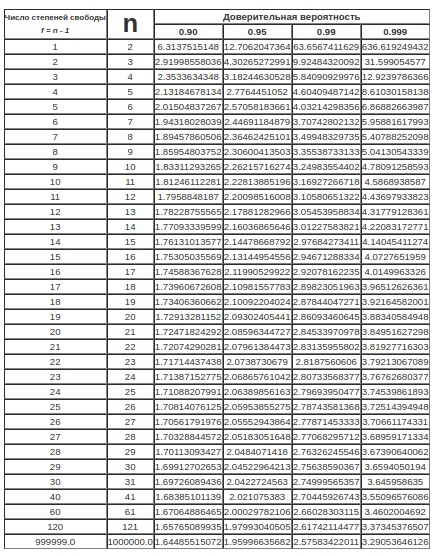

In [86]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

**?????????** Получился противоречивый результат или я что-то не так сделала или поняла

t-value не лежит в интервале (1,95996635682; 1,97993040505), поэтому нулевую гипотезу НЕ отвергаем

p-value < 0.05 поэтому нулевую гипотезу отвергаем, принимаем альтернативную - среднее значение выборки НЕ равно среднему значению генеральной совокупности

Судя по графику, вроде, совпадают средние значения 

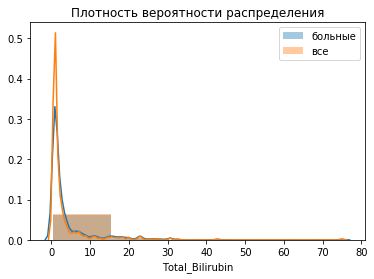

In [23]:
Total_Bilirubin_ill = data[data['Dataset']==1]['Total_Bilirubin']

sns.distplot(Total_Bilirubin_ill, 5)
sns.distplot( data['Total_Bilirubin'], 5)
plt.title('Плотность вероятности распределения')
plt.legend(['больные', 'все'])
plt.show()

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть?

Нулевая гипотеза - Total_Bilirubin не отличается у больных и здоровых людей

In [26]:
Total_Bilirubin_healthy = data[data['Dataset']==2]['Total_Bilirubin']
Total_Bilirubin_ill = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_ind(Total_Bilirubin_ill, Total_Bilirubin_healthy)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

p-value < 0.05, поэтому отвергаем нулевую гипотезу, принимаем альтернативную о том, что этот показатель отличается у больных и здоровых людей.

Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

Нулевая гипотеза - количество больных/здоровых людей не зависит от возраста

In [53]:
group1 = data.query('Age<=30')['Dataset']
group2 = data.query('Age>30 and Age<=55')['Dataset']
group3 = data.query('Age>55')['Dataset']

In [54]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

p-value < 0.05, поэтому отвергаем нулевую гипотезу, принимаем альтернативную о том, что количество больных/здоровых людей будет отличаться в разных возрастных группах